In [7]:

pip install pandas matplotlib seaborn beautifulsoup4


Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd

df = pd.read_csv("indeed-job-listings.csv")
df.head()


,body,city,company,country,expired,index_url,job_title,listing_url,location,post_date,state,status_code,summary,views
0,"World Wildlife Fund (WWF), the worldâs leadi...",Washington,World Wildlife Fund,US,False,http://api.indeed.com/ads/apisearch?publisher=...,IN-16092 Conservation Data Analysis Intern,http://www.indeed.com/viewjob?jk=7e8fe74842451...,"Washington, DC US","Mon, 25 Apr 2016 21:36:16 GMT",DC,200,"Data management, including updating database m...",17.0
1,"Job Description\n\nThe Weather Company, an IBM...",Boston,IBM,US,False,http://api.indeed.com/ads/apisearch?publisher=...,Data Science Analyst for The Weather Company,http://www.indeed.com/viewjob?jk=4332542420d6b...,"Boston, MA US","Thu, 03 Mar 2016 04:06:28 GMT",MA,200,"Provide expertise in data acquisition, data qu...",10735.0
2,Job Number: 01203341\n\n\nDescription\n\n\nSo ...,Washington,Booz Allen Hamilton,US,False,http://api.indeed.com/ads/apisearch?publisher=...,Data Scientist,http://www.indeed.com/viewjob?jk=5df3246825de1...,"Washington, DC US","Fri, 15 Apr 2016 07:31:57 GMT",DC,200,Our Data Science team:. Experience in working ...,863.0
3,everis is a multinational consulting firm prov...,Washington,Everis USA,US,False,http://api.indeed.com/ads/apisearch?publisher=...,Healthcare Data Analyst,http://www.indeed.com/viewjob?jk=ba266f8cb3fa7...,"Washington, DC US","Mon, 25 Apr 2016 19:56:40 GMT",DC,200,The Healthcare Data Analyst understands health...,10.0
4,CHASE Professionals is currently representing ...,Duluth,CHASE Professionals,US,False,http://api.indeed.com/ads/apisearch?publisher=...,Sr. Data Scientist,http://www.indeed.com/viewjob?jk=fd9df86861b6e...,"Duluth, GA US","Mon, 25 Apr 2016 14:28:26 GMT",GA,200,Strong understanding of algorithms and advance...,147.0


In [32]:
df = df[['job_title', 'summary', 'city']]
df.dropna(inplace=True)
df.head()


,job_title,summary,city
0,IN-16092 Conservation Data Analysis Intern,"Data management, including updating database m...",Washington
1,Data Science Analyst for The Weather Company,"Provide expertise in data acquisition, data qu...",Boston
2,Data Scientist,Our Data Science team:. Experience in working ...,Washington
3,Healthcare Data Analyst,The Healthcare Data Analyst understands health...,Washington
4,Sr. Data Scientist,Strong understanding of algorithms and advance...,Duluth


In [33]:
import re

# Define a simple skill keyword list
skill_keywords = ['python', 'java', 'sql', 'excel', 'tableau', 'machine learning', 
                  'data analysis', 'power bi', 'r', 'aws', 'spark', 'hadoop']

def extract_skills(text):
    text = text.lower()
    return [skill for skill in skill_keywords if skill in text]

df['skills'] = df['summary'].apply(extract_skills)
df = df[df['skills'].map(len) > 0]  # Keep only rows with at least 1 skill
df.head()


,job_title,summary,city,skills
0,IN-16092 Conservation Data Analysis Intern,"Data management, including updating database m...",Washington,[r]
1,Data Science Analyst for The Weather Company,"Provide expertise in data acquisition, data qu...",Boston,[r]
2,Data Scientist,Our Data Science team:. Experience in working ...,Washington,[r]
3,Healthcare Data Analyst,The Healthcare Data Analyst understands health...,Washington,[r]
4,Sr. Data Scientist,Strong understanding of algorithms and advance...,Duluth,[r]


In [34]:
skill_rows = []

for _, row in df.iterrows():
    for skill in row['skills']:
        skill_rows.append({'City': row['city'], 'Skill': skill})

skill_df = pd.DataFrame(skill_rows)
skill_df.head()


,City,Skill
0,Washington,r
1,Boston,r
2,Washington,r
3,Washington,r
4,Duluth,r


<Axes: xlabel='City', ylabel='Skill'>

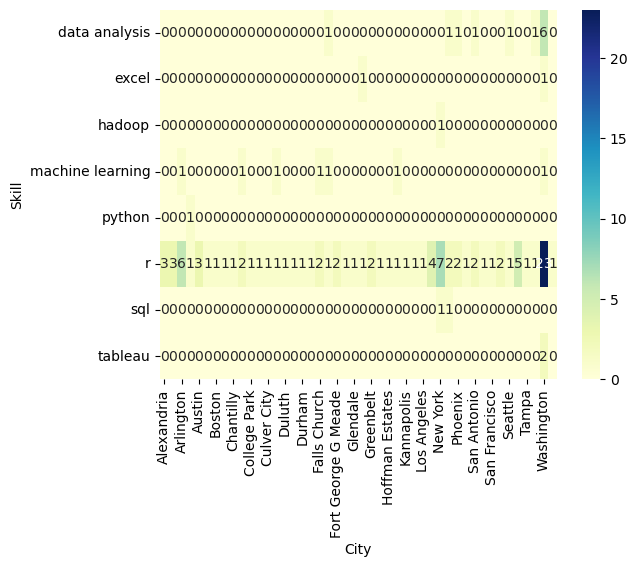

In [36]:
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".0f")


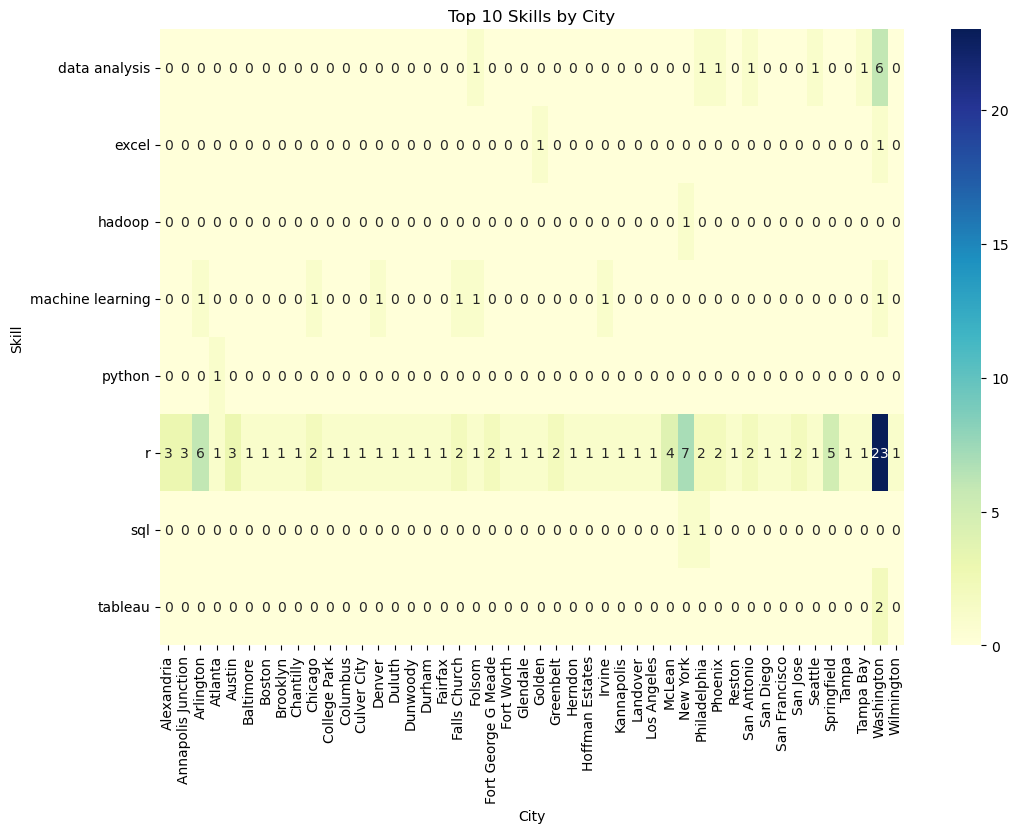

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count skill frequencies per city
city_skill_count = skill_df.groupby(['City', 'Skill']).size().reset_index(name='Count')

# Pivot for heatmap
pivot_table = city_skill_count.pivot_table(index='Skill', columns='City', values='Count', fill_value=0)

# Keep only top 10 skills
top_skills = skill_df['Skill'].value_counts().head(10).index
pivot_table = pivot_table.loc[pivot_table.index.isin(top_skills)]

# Plot heatmap (fixed)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title("Top 10 Skills by City")
plt.show()


In [41]:
skill_role_rows = []

for _, row in df.iterrows():
    for skill in row['skills']:
        skill_role_rows.append({'Role': row['job_title'], 'Skill': skill})

skill_role_df = pd.DataFrame(skill_role_rows)

# Create Skill vs Role matrix
skill_role_matrix = skill_role_df.groupby(['Skill', 'Role']).size().unstack(fill_value=0)

# Save to Excel
skill_role_matrix.to_excel("skill_role_matrix.xlsx")

# Optional: display top rows in Jupyter
skill_role_matrix.head()


Role,"AVP, Lead Data Scientist (L11)",Advanced Analytics Lead Data Scientist,Advanced Analytics Manager - Respiratory,"Analyst, Workforce Analytics",Analytics Manager,Applied Machine Learning Job,Assistant/Associate Professor (SEAS),Associate All-Source Geospatial Data Scientist,Big Data Developer-Full Time,Big Data Hadoop Performance Engineer,...,"Manager, Reporting & Analytics",Research Associate - R and D Data Scientist,"Research Physical Scientist, AST, Earth Sciences Remote Sensing",Science Education Administrator (Program Director),Sr. Data Scientist,Sr. Machine Learning Data Scientist,Statistical Data Analyst,Student Intern/Co-Op,Technology Transfer Specialist,"data scientist, Business Strategy - Seattle, WA"
Skill,,,,,,,,,,,,,,,,,,,,,
data analysis,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
excel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hadoop,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
machine learning,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
python,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Count overall demand for each skill
top_skills = skill_df['Skill'].value_counts().head(10)

# Display top skills in notebook
print("🔝 Top 10 Most In-Demand Skills Across All Job Postings:\n")
print(top_skills)


🔝 Top 10 Most In-Demand Skills Across All Job Postings:

Skill
r                   100
data analysis        12
machine learning      7
excel                 2
tableau               2
sql                   2
hadoop                1
python                1
Name: count, dtype: int64


In [46]:
Fil→ 

SyntaxError: invalid character '→' (U+2192) (200487833.py, line 1)